In [1]:
import requests
import json
import time
from datetime import datetime
import pandas as pd

In [2]:
import numpy as np
from numpy import savetxt
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

# Data description
- The data is collected from benchmark, simulated malware and simulated stress application
- 12 metrics are listed as below:
 
 - 0) cpu_system
 - 1) cpu_idle
 - 2) cpu_user
 - 3) cpu_iowait
 - 4) pod_count
 - 5) system_load
 - 6) mem_total
 - 7) mem_avail
 - 8) disk_io
 - 9) disk_space_used
 - 10) net_received
 - 11) net_transmit

Other metrics related to timestamp
 - 12) timestamp (is the index of pandas)
 - 13) year
 - 14) month
 - 15) day
 - 16) hour
 - 17) minute
 - 18) second

In [4]:
!rm -rf CBT
!git clone https://github.com/levanthanh3005/CBT

Cloning into 'CBT'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 146 (delta 21), reused 140 (delta 15), pack-reused 0
Receiving objects: 100% (146/146), 3.43 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [27]:
def viewAllDataFromFolder(dataPath):
    onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    count = 0
    fileLs = []
    lsBdTrain = None
    dataList = []
    for fs in onlyfiles:
        count = count + 1
        dataItem = pd.read_pickle(dataPath+"/"+fs)
        dataList.append(dataItem)
    frame = pd.concat(dataList)
    return frame

In [28]:
dataset = viewAllDataFromFolder("CBT/data")

# Data Shape and Label Count

In [29]:
print("Data Shape",dataset.shape)
print("Label counts:")
print(dataset["label"].value_counts())

Data Shape (10876, 14)
Label counts:
1    5552
0    5324
Name: label, dtype: int64


# Data Overview

In [30]:
dataset["timemm"] = dataset.index
dataset['timemm'] = dataset['timemm'].apply(lambda x: datetime.fromtimestamp(x))
dataset["year"] = dataset['timemm'].apply(lambda x:x.year)
dataset["month"] = dataset['timemm'].apply(lambda x:x.month)
dataset["day"] = dataset['timemm'].apply(lambda x:x.day)
dataset["hour"] = dataset['timemm'].apply(lambda x:x.hour)
dataset["minute"] = dataset['timemm'].apply(lambda x:x.minute)
dataset["second"] = dataset['timemm'].apply(lambda x:x.second)
del dataset['timemm']

dataset["node"] = dataset["node"].apply(lambda x : 2 if x=="tan-k2" else 3 if x=="tan-k3" else 1 if x=="tan-km" else x)

## Proprotion of nodes

In [31]:
print(dataset["node"].value_counts())
dataset.head()

3    8306
2    1285
1    1285
Name: node, dtype: int64


,cpu_system,cpu_idle,cpu_user,cpu_iowait,pod_count,system_load,mem_total,mem_avail,disk_io,disk_space_used,net_received,net_transmit,node,label,year,month,day,hour,minute,second
timestamp,,,,,,,,,,,,,,,,,,,,
1.625210e+09,0.055000,0.758333,0.171000,0.001000,9.0,0.70,2.641199e+09,1.444844e+09,0.006933,0.590030,605856.533333,8.034681e+06,2,1,2021,7,2,7,16,45
1.625210e+09,0.055000,0.758333,0.171000,0.001000,9.0,0.70,2.641199e+09,1.444844e+09,0.006933,0.590030,605856.533333,8.034681e+06,2,1,2021,7,2,7,16,50
1.625210e+09,0.046333,0.813333,0.115333,0.000667,9.0,0.71,2.678424e+09,1.407619e+09,0.001867,0.590039,893741.333333,8.794958e+06,2,1,2021,7,2,7,16,55
1.625210e+09,0.046333,0.813333,0.115333,0.000667,9.0,0.71,2.678424e+09,1.407619e+09,0.001867,0.590039,893741.333333,8.794958e+06,2,1,2021,7,2,7,17,0
1.625210e+09,0.046333,0.813333,0.115333,0.000667,9.0,0.71,2.678424e+09,1.407619e+09,0.001867,0.590039,893741.333333,8.794958e+06,2,1,2021,7,2,7,17,5


In [32]:
def normalizeColumn(dataset):
  cols = dataset.columns
  for e in range(0,12):
    normalized_df=(dataset[cols[e]]-dataset[cols[e]].mean())/dataset[cols[e]].std()
    dataset[cols[e]] = normalized_df
  return dataset

def viewMetric(metric, dataset):
    ndf = dataset[[metric,"label","node"]]
#     print("View each label in a graph and put them next to others")
#     print("Calculate min max std ..")
    ndf0 = ndf[ndf["label"]==0]
    ndf1 = ndf[ndf["label"]==1]

    fig, (ax0, ax1) = plt.subplots(1, 2)
    fig.set_size_inches(15, 3)
    ax0.plot(ndf0[metric].to_numpy())
    ax0.set_title(metric+" with label 0")
    ax1.plot(ndf1[metric].to_numpy())
    ax1.set_title(metric+" with label 1")

def viewAllMetrics(dataset):
    cols = dataset.columns
    for e in range(0,12):
        viewMetric(cols[e],dataset)

## Normalize data

In [33]:
dataset = normalizeColumn(dataset)

## Overview of data

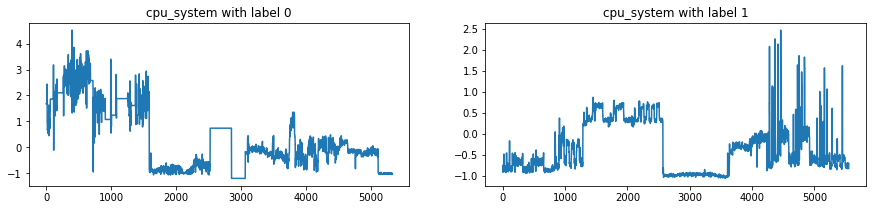

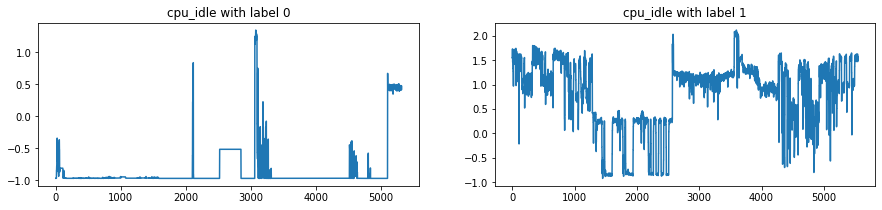

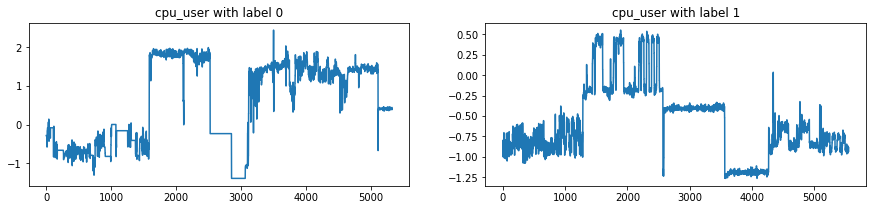

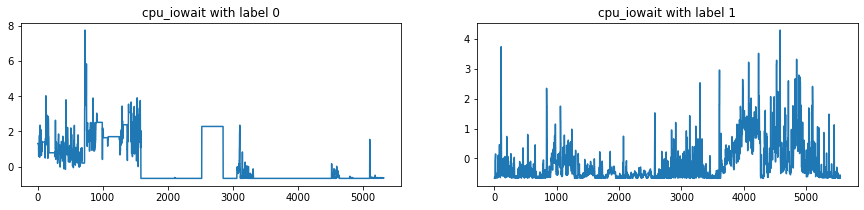

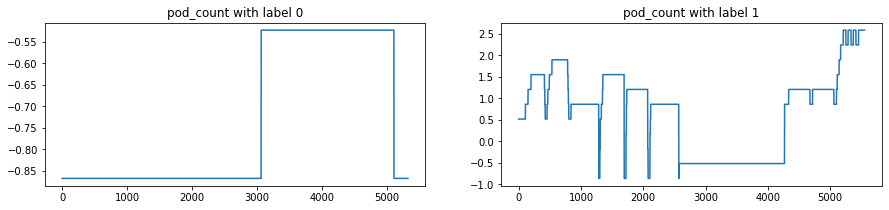

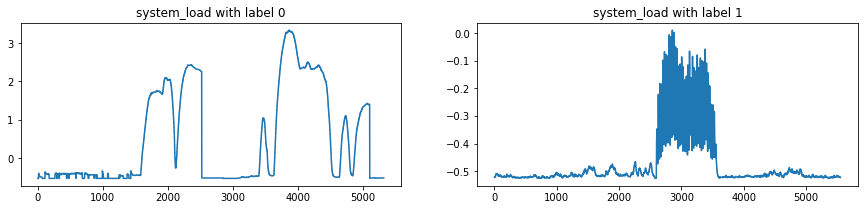

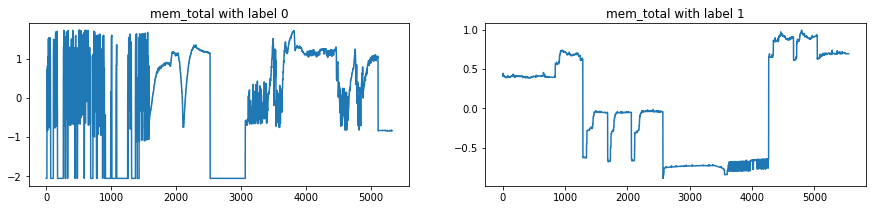

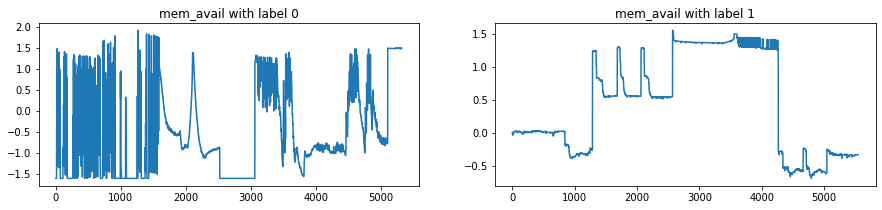

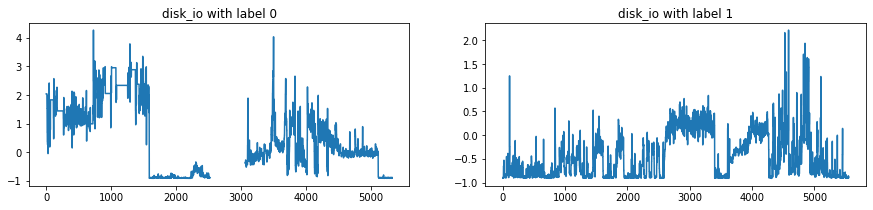

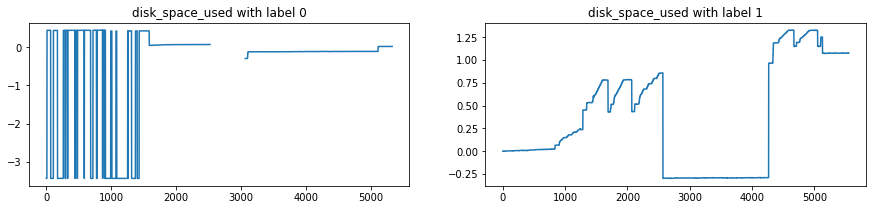

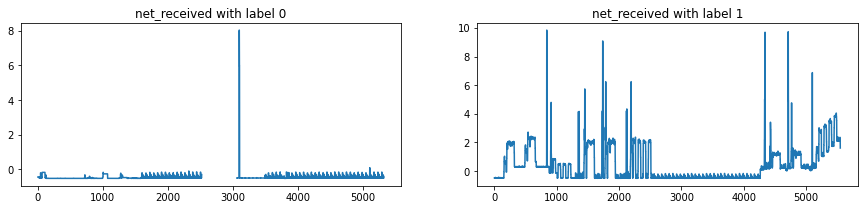

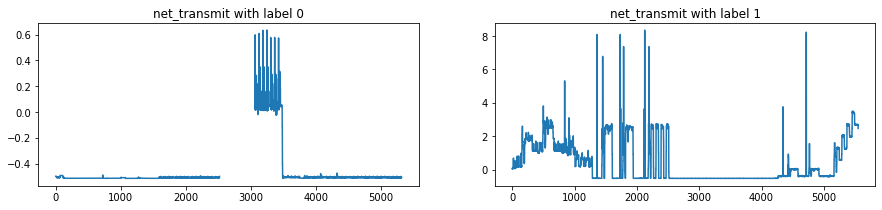

In [34]:
viewAllMetrics(dataset)